In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('runs/rewards/rewards_11.pk', 'rb') as f:
    rewards = pk.load(f)

<Figure size 600x400 with 0 Axes>

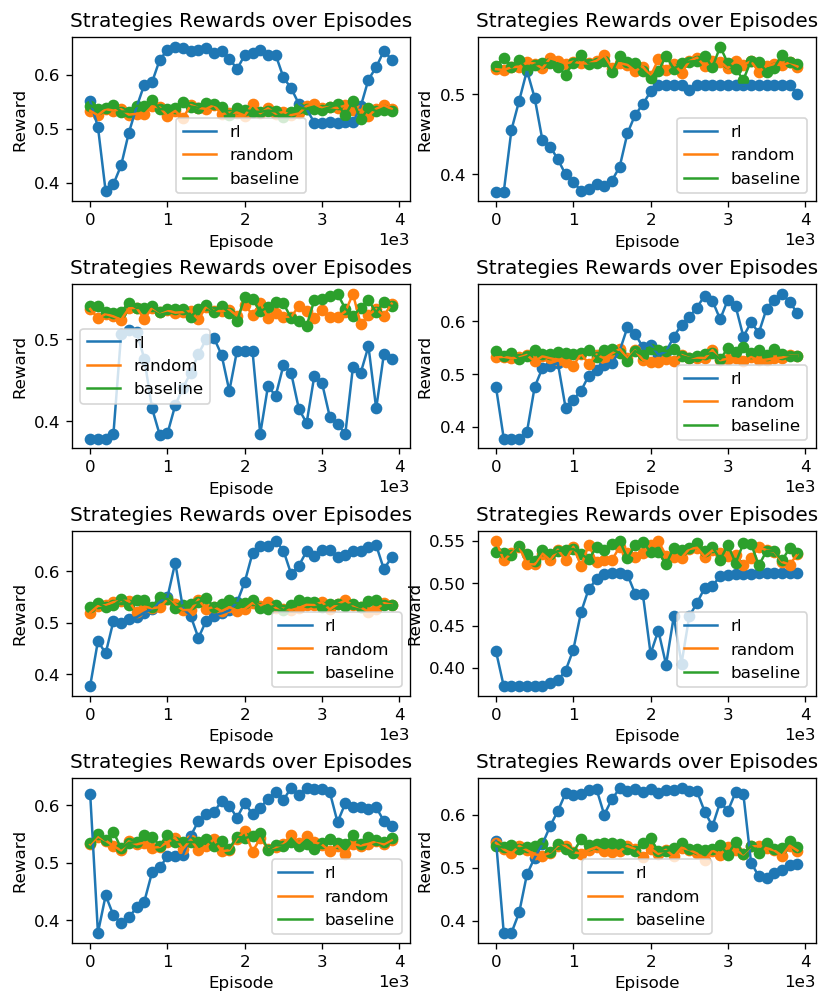

In [3]:
fig = plt.figure(dpi=100)

rows = 4
cols = 2
fig, ax = plt.subplots(rows,cols, dpi=120, figsize=(8,10))

for row_ in range(rows):
    for col_ in range(cols):
        i = cols*row_+col_
        with open(f'runs/rewards/rewards_{i}.pk', 'rb') as f:
            rewards = pk.load(f)
        for k in ['rl', 'random', 'baseline']:
            ax[row_,col_].plot(rewards['episode'], rewards[k], label=k)
            ax[row_,col_].scatter(rewards['episode'], rewards[k])
        ax[row_,col_].legend()
        ax[row_,col_].set_xlabel('Episode')
        ax[row_,col_].set_ylabel('Reward')
        ax[row_,col_].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
        ax[row_,col_].set_title('Strategies Rewards over Episodes')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [4]:
import glob
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

rewards = {'rl':{}, 'baseline':{}, 'random':{}}
paths = glob.glob('runs/rewards/*.pk')
for path_ in paths:
    name = 'sim_' + path_.split('rewards_')[-1].split('.pk')[0]
    with open(path_, 'rb') as f:
        df = pd.DataFrame(pk.load(f))
        for k in ['rl', 'baseline', 'random']:
            rewards[k].update({name: df[k]})

rewards = {k:pd.DataFrame(v) for k, v in rewards.items()}

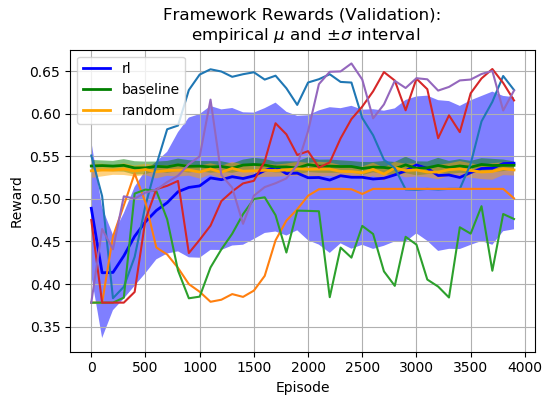

In [5]:
t = np.arange(40)*100
fig, ax = plt.subplots(1, dpi=100)
strats = list(zip(['rl', 'baseline', 'random'], ['blue', 'green', 'orange']))

for strategy, color in strats:
    mu = rewards[strategy].mean(axis=1)
    sigma = rewards[strategy].std(axis=1)
    ax.plot(t, mu, lw=2, label=strategy, color=color)
    ax.fill_between(t, mu+sigma, mu-sigma, facecolor=color, alpha=0.5)

for i in range(0,5):
    ax.plot(t, rewards['rl'][f'sim_{i}'].values)
    
ax.set_title('Framework Rewards (Validation):\n empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
fig.savefig('results.png', dpi=120)

In [9]:
rewards['rl'].shape

(40, 25)

In [7]:
rewards['rl']

,sim_0,sim_11,sim_15,sim_4,sim_21,sim_14,sim_5,sim_20,sim_24,sim_1,...,sim_17,sim_23,sim_6,sim_2,sim_13,sim_3,sim_12,sim_16,sim_22,sim_7
0,0.550838,0.378204,0.562624,0.378204,0.619261,0.505055,0.419326,0.361962,0.550838,0.378204,...,0.373006,0.504704,0.619261,0.378204,0.475239,0.475239,0.505055,0.511720,0.550838,0.550838
1,0.503154,0.550838,0.378204,0.464669,0.378204,0.619261,0.378204,0.378204,0.378204,0.378204,...,0.623837,0.378810,0.378204,0.378204,0.378204,0.378204,0.378204,0.378204,0.378204,0.378204
2,0.383403,0.513283,0.382586,0.440803,0.378204,0.511696,0.378204,0.425787,0.424624,0.455886,...,0.408482,0.483908,0.443204,0.378204,0.378204,0.378204,0.378204,0.456053,0.378204,0.378204
3,0.396796,0.502716,0.445234,0.502982,0.378204,0.426741,0.378204,0.446262,0.405276,0.492315,...,0.398690,0.523993,0.408680,0.384096,0.379021,0.378204,0.408197,0.513083,0.378204,0.416466
4,0.431837,0.514600,0.464575,0.500316,0.388602,0.444502,0.378204,0.421380,0.400382,0.529772,...,0.391300,0.541335,0.394729,0.506199,0.425354,0.390718,0.483707,0.581845,0.378513,0.487871
5,0.492435,0.549099,0.488358,0.507401,0.400565,0.463046,0.378204,0.379838,0.384638,0.495750,...,0.404087,0.566890,0.405028,0.510916,0.450322,0.475909,0.507697,0.576608,0.394605,0.519076
6,0.539719,0.550499,0.514918,0.510649,0.406765,0.493101,0.378204,0.378204,0.396611,0.442919,...,0.441186,0.581943,0.422148,0.509195,0.496844,0.511374,0.511323,0.499711,0.428040,0.544585
7,0.581669,0.546405,0.516413,0.519735,0.489814,0.516783,0.381509,0.378204,0.404446,0.434774,...,0.462599,0.586322,0.432546,0.476057,0.527981,0.515313,0.516756,0.441199,0.439268,0.578386
8,0.586037,0.535344,0.529557,0.527151,0.574356,0.525756,0.385173,0.384244,0.400572,0.418991,...,0.495195,0.580575,0.483187,0.415884,0.547567,0.521029,0.576170,0.447215,0.412839,0.606953
9,0.627720,0.527005,0.546693,0.540658,0.617667,0.538957,0.396623,0.420202,0.410846,0.399928,...,0.497460,0.591569,0.491922,0.383304,0.552705,0.436374,0.580563,0.442140,0.398554,0.640061
